# Лабораторная работа 2
## Вариант 1
<br>
Иванов О. S4102

### Математическое ожидание, дисперсия и математическое ожидание квадрата

Дано распределение плотности случайной величины:

$$
    f_\xi(x) = \theta^2xe^{-\theta x}
$$

Это гаммар-распределение, для которого при $x < 0$
$$
    f_\xi(x) = 0
$$

Для каждого $\theta$:

$$
    \theta \in \{0.5, 2, 8\}
$$

Аналитически вычислить матожидание, дисперсию, матожидание квадрата

#### Вычисление матожидания

Поскольку имеем дело с показательным распределением, используем определение математического ожидания для абсолютно непрерывного распределения:

$$
    E\xi = \int\limits_{-\infty}^{+\infty} x f_{\xi}(x) dx
$$

Вычисляем для данной функции распределения плотности: 

$$
    E\xi = \int\limits_{0}^{+\infty} x \theta^2xe^{-\theta x} dx
$$

Интегрируем по частям, используя формулу

$$
    \int udv = uv - \int vdu
$$

Пусть
$$
    u = x^2 \\
    du = 2xdx \\
$$

$$
    dv = e^{-\theta x}dx \\
    v = -\frac{e^{-\theta x}}{\theta} \\
$$

$$
   E\xi = \theta^2(x^2 -\frac{e^{-\theta x}}{\theta} + \frac{2}{\theta} \cdot \int\limits_{0}^{+\infin}e^{-\theta x}xdx)
$$

Снова интегрируем по частям:

$$
    u = x \\
    du = dx
$$

$$
    dv = e^{-\theta x}dx \\
    v = -\frac{e^{-\theta x}}{\theta}
$$

$$
    E\xi = \theta^2(x^2 -\frac{e^{-\theta x}}{\theta} + \frac{2}{\theta} \cdot (x\cdot (-\frac{e^{-\theta x}}{\theta}) + \frac{2}{\theta} \int\limits_{0}^{+\infin} e^{-\theta x}dx))
$$

$$
   E\xi =  \theta^2(x^2 -\frac{e^{-\theta x}}{\theta} + \frac{2}{\theta} \cdot (x\cdot (-\frac{e^{-\theta x}}{\theta}) - \frac{2}{\theta^2} e^{-\theta x}))
$$

$$
    E\xi = \frac{2}{\theta}
$$

Тогда для каждого $\theta$:

$$
    \theta = 0.5: E\xi = 4 \\
$$
$$
    \theta = 2: E\xi = 1 \\
$$
$$
    \theta = 8: E\xi = \frac{1}{4} \\
$$

Проверим решение с помощью scipy.integrate: 

In [78]:
import scipy.integrate as integrate
import numpy as np

def integrand(x, theta):
    return x * theta**2 * x * np.exp(-theta * x)

theta_values = [0.5, 2, 8]

for theta_value in theta_values:
    result, error = integrate.quad(integrand, 0, np.inf, args=(theta_value))
    print(f"Theta = {theta_value}\nResult: {result}, Error: {error}")




Theta = 0.5
Result: 4.0, Error: 8.486955660083946e-11
Theta = 2
Result: 0.9999999999999999, Error: 1.3633026582969806e-10
Theta = 8
Result: 0.25, Error: 3.239160193627488e-09


#### Вычисление дисперсии

Формула для расчета дисперсии: 
$$
Var_\xi = E_{\xi^2} - (E_\xi)^2
$$

$$

E_{\xi^2} = \int\limits_{0}^{+\infty} x^2 \theta^2xe^{-\theta x} dx

$$

Интегрируя по частям, получим математическое ожидание квадрата: 

$$

E_{\xi^2} = \frac{6}{\theta^2}

$$

Тогда для каждого $\theta$:

$$
    \theta = 0.5: E_{\xi^2} = 24 \\
$$
$$
    \theta = 2: E_{\xi^2} = 1.5 \\
$$
$$
    \theta = 8: E_{\xi^2} = \frac{3}{32} \\
$$

In [79]:
import scipy.integrate as integrate
import numpy as np

def integrand(x, theta):
    return x**2 * theta**2 * x * np.exp(-theta * x)

theta_values = [0.5, 2, 8]

for theta_value in theta_values:
    result, error = integrate.quad(integrand, 0, np.inf, args=(theta_value))
    print(f"Theta = {theta_value}\nResult: {result}, Error: {error}")


Theta = 0.5
Result: 24.0, Error: 7.892953765429494e-09
Theta = 2
Result: 1.5, Error: 1.4042403263738922e-09
Theta = 8
Result: 0.09375000000000001, Error: 2.095098931026592e-09


Имеем ранее полученное значение математического ожидания. Тогда: 

$$
    (E_\xi)^2 = \frac{4}{\theta^2}
$$

Тогда дисперсия: 

$$
    Var_\xi = \frac{6}{\theta^2} - \frac{4}{\theta^2} = \frac{2}{\theta^2}
$$

Тогда для каждого $\theta$:

$$
    \theta = 0.5: Var_\xi = 8 \\
$$
$$
    \theta = 2: Var_\xi = 0.5 \\
$$
$$
    \theta = 8: Var_\xi = \frac{1}{32} \\
$$

$$
    k \in \{16, 32, ... , 2^i , ... , 2^{15}\}
$$

Для того, чтобы построить выборку, необходимо использовать CDF.
По определению, CDF вычисляется интегрированием PDF: 

$$
    F_\xi(x) = \int\limits_{-\infin}^{x}\theta^2xe^{-\theta x}dx
$$

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.optimize import fsolve
from scipy import integrate

In [112]:
def pdf(x, theta):
    return theta**2 * x * np.exp(-theta * x)

def cdf(x, theta):
    return integrate.quad(lambda t: pdf(t, theta), 0, x)[0]

def inverse_cdf(u, theta):
    return fsolve(lambda x: cdf(x, theta) - u, x0=0.1)[0]

# функция генерации выборки для k из n_элементов, base: число, power_range: степени числа
def generate_samples(base, power_range, theta):
    samples = {}
    for power in power_range:
        num_samples = base**power
        uniform_samples = np.random.rand(num_samples)
        xi_samples = [inverse_cdf(u, theta) for u in uniform_samples] # выборка по обратной функции
        sample_mean = sum(xi_samples) / num_samples # вычисляем среднее выбоки
        samples.update({num_samples : sample_mean}) # записываем в словарь количество элементов в выборке : среднее выборки
    return samples

In [108]:
import matplotlib.pyplot as plt

# данные значения тета
theta_values = [0.5, 2, 8]

# генерируем выборки из k элементов (k in 2^2 ... 2^i ... 2^15)
mean_samples = [generate_samples(2, range(4, 16, 1), cur_theta) for cur_theta in theta_values]

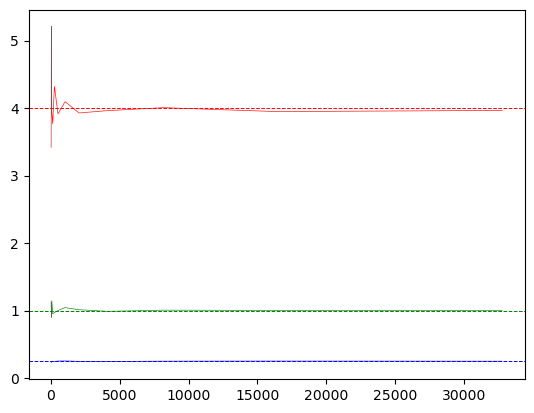

In [114]:
colors = ['red', 'green', 'blue']

# вычисленные значения матожидания
calculated_means = [4, 1, 0.25]

# извлекаем из словаря значения размера выборки (x)
# и средние по выборкам (y), строим график
for i in range(len(mean_samples)):
    x = list(mean_samples[i].keys())
    y = list(mean_samples[i].values())
    plt.plot(x, y, color=colors[i], animated=True, alpha = 0.9, linewidth=0.5)

for i in range(len(calculated_means)):
    plt.axhline(calculated_means[i], color=colors[i], label = f'{theta_values[i]}', linestyle='--', linewidth=0.7)


plt.show()


#### 1.2 Мода, матожидание и медиана

Дано распределение плотности показательного распределения со смещением: 

$$
    f_{\xi}^{\lambda, a}(x) = 
    \begin{cases}
        \lambda e^{-\lambda(x-a)},&\ x \ge a, \\
        0, &\ else
    \end{cases}
$$

Для того, что найти моду при заданной PDF, необходимо продифференцировать функцию. Мода определяется при равенстве производной нулю или при незаданном значении производной. 

Для $x \ge a$:

$$
{f'}_{\xi}^{\lambda, a}(x) = \frac{d}{dx}(\lambda e^{-\lambda(x-a)})
$$

Применяем правило дифференцирования сложной функции (chain rule):

$$
    \frac{dy}{dx} = \frac{dy}{du}\frac{du}{dx}
$$

$$
{f'}_{\xi}^{\lambda, a}(x) = -\lambda^2 e^{-\lambda(x-a)}
$$

Найдем экстремумы, приравняв производную к нулю:

$$
-\lambda^2 e^{-\lambda(x-a)} = 0
$$

$$
e^{-\lambda(x-a)} = 0
$$

Видим, что для данного выражения не существует такого x, при котором оно было бы равно нулю (стремится к нулю при $x \rightarrow \infin$)

Для $x < a$ производная равна нулю на всем интервале, т.к. PDF также равна нулю.

Данная PDF не имеет определенной моды, т.к. не является симметричной или унимодальной. 
<br>Мода может быть определена как $x=a$, основываясь на функции, определенной на интервале $x \ge a$

Для первого варианта значения параметров $(\lambda, a): (1,5)$

In [86]:
analytical_mode = 5

Тогда, учитывая, что мода определена при $x=a$, мода равна $5$

##### Математическое ожидание

Математическое ожидание при заданной PDF находится интегрированием функции:
$$
    E_{\xi} = \int\limits_{-\infin}^{+\infin}xf_{\xi}(x)dx
$$

Подставим данные значения параметров:

$$
    f_{\xi}(x) = 
    \begin{cases}
        1 \cdot e^{-x+5},&\ x \ge 5, \\
        0, &\ else
    \end{cases}
$$

$$
   E_{\xi} = \int\limits_{5}^{+\infin} xe^{-x+5}dx
$$

$$
   E_{\xi} = e^5\int\limits_{5}^{+\infin} xe^{-x}dx
$$

$$
\int\limits_{5}^{+\infin} xe^{-x}dx
$$

Подставляем:
$$
    u = x \\
    du = dx
$$

$$
    dv = e^{-x} \\
    v = -e^{-x}
$$

$$
    -xe^{-x} - \int\limits_{5}^{+\infin}-e^{-x}dx
$$

$$
    -xe^{-x} - e^{-x}
$$

$$
    -xe^{5-x} - e^{5-x} = -(x + 1)e^{5-x} 
$$

Проверяем:

In [115]:
import sympy as smp 

x = smp.symbols('x', real=True)
f = x * smp.exp(-x+5)

smp.integrate(f, x)

(-x - 1)*exp(5 - x)

In [116]:
analytical_expected_value = 6

Получаем

$$
    E_{\xi} = 6
$$

##### Медиана

Для того, чтобы найти медиану, необходимо найти значения случайной величины, когда CDF равна 1/2

CDF находится интегрированием данной PDF

$$
    f_{\xi}^{\lambda, a}(x) = 
    \begin{cases}
        \lambda e^{-\lambda(x-a)},&\ x \ge a, \\
        0, &\ else
    \end{cases}
$$

$$
    F_{\xi}(t) = \int\limits_{-\infin}^{x} f_{\xi}(t)dt
$$

$$
    F_{\xi}(t) = \int\limits_{5}^{x} e^{t-5}dt = \frac{1}{2}
$$

In [117]:
import sympy as smp

x, lambda_val, a = smp.symbols('x lambda a')
cdf_expr = smp.integrate(lambda_val*smp.exp(-lambda_val*(x-a)), (x,a,x))
cdf_expr

1 - exp(-lambda*(-a + x))

In [118]:
import sympy as smp

x = smp.symbols('x')

lambda_val = 1
a = 5

pdf = lambda_val * smp.exp(-lambda_val * (x - a))

cdf = smp.integrate(pdf, (x, a, x))

# Solve for x when CDF(x) = 0.5 to find the median
analytical_median = smp.solve(cdf - 0.5, x)
analytical_median

[5.69314718055995]

Таким образом, значение медианы $5.693$

$$
    median = 5.693
$$

##### Создаем выборку

Для того, чтобы сгенерировать выборку, необходимо произвести обратное преобразование CDF (inverse transform sampling)

Для этого

In [119]:
from IPython.display import display, Math

x, lambda_val, a, u = smp.symbols('x lambda a u')
inverse_transform_expr = smp.solve(smp.Eq(cdf_expr, u), x)
inverse_transform_expr[0]

log(-exp(a*lambda)/(u - 1))/lambda

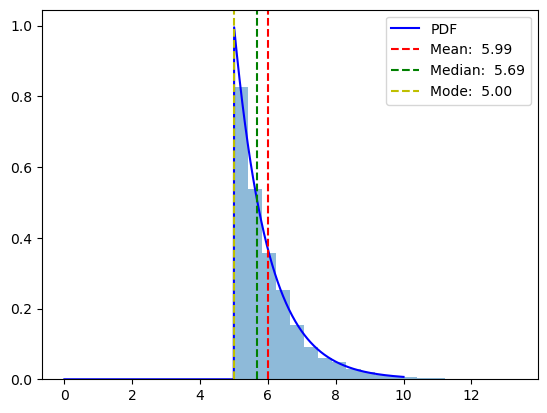

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

num_samples = 10000
lambda_val = 1
a = 5

def pdf_function(x, lambda_val, a):
    return lambda_val * np.exp(-lambda_val * (x - a)) * (x >= a)

def inverse_cdf_analytic(u, lam, a):
    return (np.log((-np.exp(a*lam)/(u-1)))/lam)

def manual_median(data):
    data.sort()
    data_len = len(data)

    if data_len % 2 == 1:
        median = data[data_len // 2]
    else:
        median = (data[data_len // 2] + data[data_len // 2 + 1]) / 2
    
    return median


x_values = np.linspace(0, 10, 1000)

plt.plot(x_values, pdf_function(x_values, lambda_val, a), label='PDF', color='b')

uniform_sample = np.random.rand(num_samples)

inverse_sample = [inverse_cdf_analytic(u, lambda_val, a) for u in uniform_sample]

inverse_sample_mean = sum(inverse_sample) / len(inverse_sample)
inverse_sample_median  = manual_median(inverse_sample)
inverse_sample_mode = mode(inverse_sample, keepdims=False)[0]

plt.axvline(inverse_sample_mean, linestyle='--', color='r', label=f'Mean: {inverse_sample_mean : .2f}')
plt.axvline(inverse_sample_median, linestyle='--', color='g', label = f'Median: {inverse_sample_median : .2f}')
plt.axvline(inverse_sample_mode, linestyle='--', color='y', label = f'Mode: {inverse_sample_mode : .2f}')
plt.legend()

plt.hist(inverse_sample, bins=20, density=True, alpha=0.5)

plt.show()


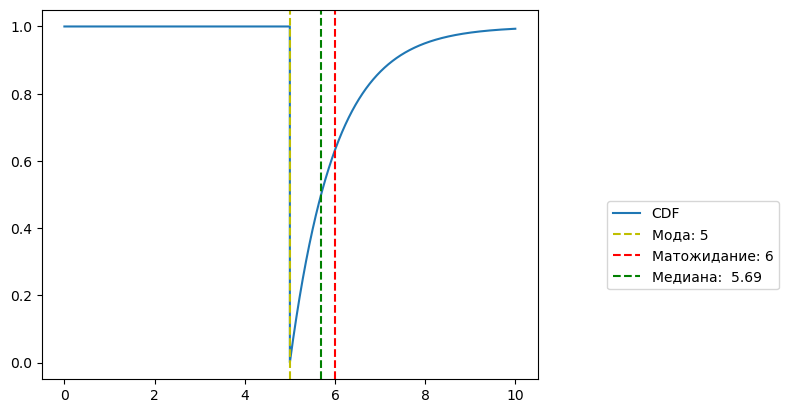

In [93]:
lam = 1
a = 5

n_samples = 10000

def pdf(x, lam, a):
    return lam * np.exp(-lam * (x - a)) * (x >= a)

def cdf_function(x, lam, a):
    return  1 - np.exp(-lam * (-a + x)) * (x >= a)

x_values = np.linspace(0, 10, n_samples)
uniform_distr = np.random.rand(n_samples)


plt.plot(x_values, cdf_function(x_values, lam, a), label='CDF')
plt.axvline(analytical_mode, color='y', linestyle='--', label = f'Мода: {analytical_mode}')
plt.axvline(analytical_expected_value, color='r', linestyle='--', label=f'Матожидание: {analytical_expected_value}')
plt.axvline(analytical_median, color='g', linestyle='--', label=f'Медиана: {analytical_median[0] : .2f}')
plt.legend(loc=1, bbox_to_anchor=(0.5, 0., 1, 0.5))
plt.show()

#### 1.3 Совместное распределение двух случайных величин

$$
\begin{array}{|c|c|c|c|}
\hline
{\xi / \eta} & 1 & 2 & 3 & ...\\
\hline
\text{-1} & {\frac{2}{5} \cdot \frac{1}{2^1}} & {\frac{2}{5} \cdot \frac{1}{2^2}}  & {\frac{2}{5} \cdot \frac{1}{2^3}} & {...} \\
\hline
\text{0} & {\frac{1}{5} \cdot \frac{1}{2^1}} & {\frac{1}{5} \cdot \frac{1}{2^2}} & {\frac{1}{5} \cdot \frac{1}{2^3}} & {...} \\
\hline
\text{1} & {\frac{2}{5} \cdot \frac{1}{2^1}} & {\frac{2}{5} \cdot \frac{1}{2^2}} & {\frac{2}{5} \cdot \frac{1}{2^3}} & {...}\\
\hline
\end{array}
$$


Корреляционная матрица рассчитывается по следующей формуле: 

$$
    Corr({\xi, \eta}) = \frac{Cov({\xi, \eta})}{\sqrt{Var(\xi) \cdot Var(\eta)}}
$$
 

$$
    Cov(\xi, \eta) = E_{\xi \eta} - E_{\xi} \cdot E_{\eta}
$$

$$

    E_{\xi \eta} = \sum_{\xi} \sum_{\eta} \xi \eta \cdot P(\xi. \eta)

$$

$$
     E_{\xi \eta} = -1 \cdot \frac{2}{5} \cdot \frac{1}{2^\eta} + 0 \cdot \frac{1}{5} \cdot \frac{1}{2^\eta} + 1 \cdot \frac{2}{5} \cdot \frac{1}{2^\eta} = 0
$$


$$
    E_{\xi} = \sum_{\xi} \xi \cdot P(\xi)
$$

$$
    E_{\xi} = -1 \cdot \frac{2}{5}  + 0 \cdot \frac{1}{5}  + 1 \cdot \frac{2}{5}  = 0
$$

$$
    E_{\xi^2} = 1 \cdot \frac{2}{5}  + 0 \cdot \frac{1}{5}  + 1 \cdot \frac{2}{5}  = \frac{4}{5}
$$

$$
    Var_\xi = \frac{4}{5}
$$

$$
    E_{\eta} = \sum_{\eta} \eta \cdot P(\eta)
    E_{\eta} = \sum_{\eta} \eta \cdot P{\eta} = \sum_{\eta} \eta \cdot \frac{1}{2^\eta}
$$

$$
    E_{\eta} = \sum_{\eta} \eta \cdot P{\eta} = \sum_{\eta} \eta \cdot \frac{1}{2^\eta}
$$

$$
    E_{\eta^2} = \sum_{\eta} \eta^2 \cdot P{\eta} = \sum_{\eta} \eta^2 \cdot \frac{1}{2^\eta}
$$

$$
    Var_\xi = 
$$

Найдем ковариационную матрицу

In [137]:
import numpy as np

np.random.seed(0)
num_samples = 1000000

# Simulate data for eta
eta_values = np.arange(1, 63)
eta_probs = 1 / 2 ** eta_values
eta_probs /= np.sum(eta_probs)
eta_samples = np.random.choice(eta_values, size=num_samples, p=eta_probs)

# Simulate data for xi
xi_values = np.array([-1, 0, 1])
xi_probs = np.array([2/5, 1/5, 2/5])
xi_samples = np.random.choice(xi_values, size=num_samples, p=xi_probs)

# Calculate the correlation between eta and xi
correlation_matrix = np.corrcoef(eta_samples, xi_samples)

print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
[[ 1.00000000e+00 -9.74832667e-04]
 [-9.74832667e-04  1.00000000e+00]]
